In [ ]:
!pip install Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 65 kB 2.2 MB/s 
     |████████████████████████████████| 49 kB 4.4 MB/s 
     |████████████████████████████████| 45 kB 2.9 MB/s 
  Created wheel for Prophet: filename=prophet-1.0.1-py3-none-any.whl size=6641272 sha256=36763f214167a08a1cb6155ca3b5061bf0b6c48edcd42d278b45343c10bb44f6
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built Prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [ ]:
from prophet import Prophet
from pandas.tseries.offsets import MonthEnd
import pandas as pd
import numpy as np
from datetime import datetime

In [ ]:
df = pd.read_csv('ChinaFootwearMarketHist.csv')
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y') + MonthEnd(1)
df.columns = ['ds', 'y']
df = df.dropna()

In [ ]:
# COVID Outliers
covid_outlier_st = datetime.strptime('2020-03-31', '%Y-%m-%d').date()
covid_outlier_en = datetime.strptime('2020-05-31', '%Y-%m-%d').date()

df.loc[(df['ds'].dt.date >= covid_outlier_st) & (df['ds'].dt.date <= covid_outlier_en), 'y'] = None

<AxesSubplot:xlabel='ds'>

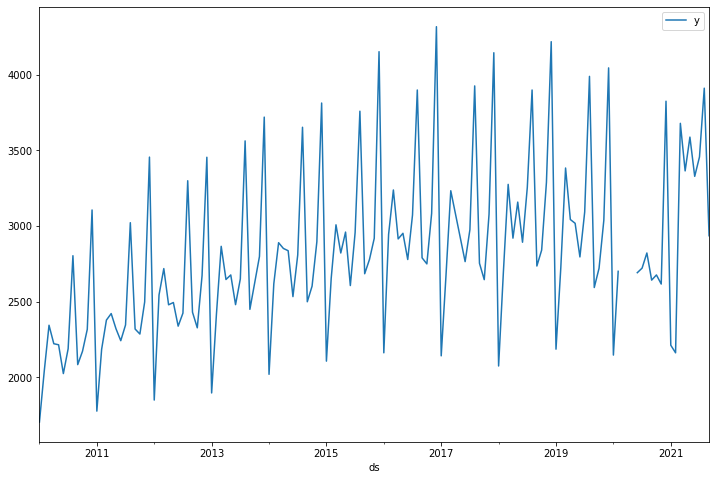

In [ ]:
df.plot(x='ds', y='y', figsize=(12,8))

In [ ]:
# Facebook Prophet Model
model = Prophet(seasonality_mode='multiplicative', daily_seasonality=False, weekly_seasonality=False)
model.fit(df)

Initial log joint probability = -3.93551
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       378.925    0.00212188       73.6667      0.2573      0.2573      144   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     155       379.148   1.96685e-05       65.4775   3.845e-07       0.001      264  LS failed, Hessian reset 
     199        379.15   3.93546e-08       57.5153           1           1      334   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     202        379.15   5.25536e-09       68.1076     0.03664      0.9585      339   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


In [ ]:
# Make future dates
future = model.make_future_dataframe(periods=51, freq='M')
future = future[future['ds'].dt.year <= datetime.now().year+5]
future

,ds
0,2010-01-31
1,2010-02-28
2,2010-03-31
3,2010-04-30
4,2010-05-31
...,...
187,2025-08-31
188,2025-09-30
189,2025-10-31
190,2025-11-30


In [ ]:
# Forecast
forecast = model.predict(future)

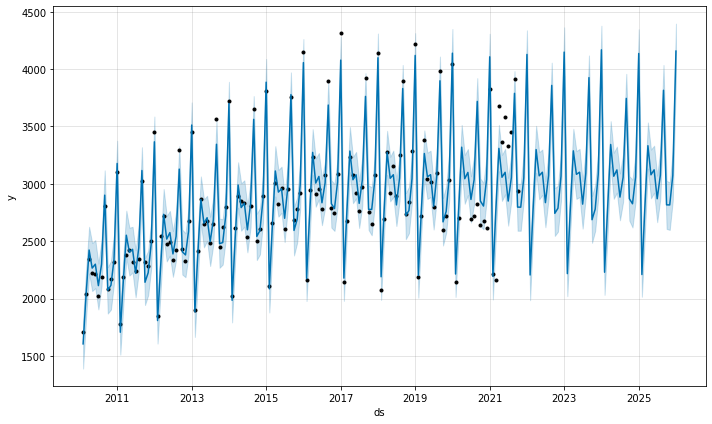

In [ ]:
model.plot(forecast);

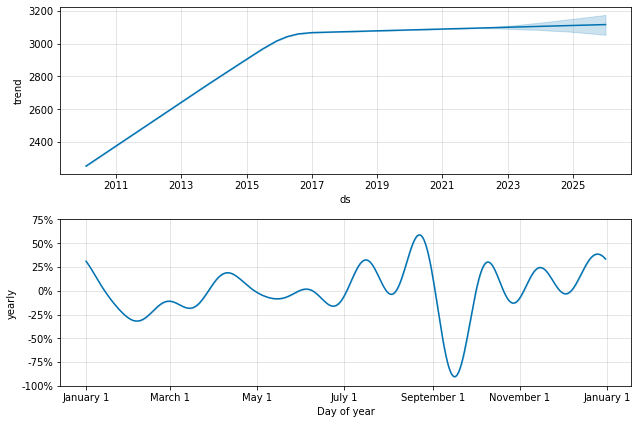

In [ ]:
model.plot_components(forecast);

In [ ]:
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].to_csv('ChinaPred.csv')